# Module 1.3 - **Hands-On Astronomy**
## _Aniket Kukreti_ and _Ashish Shroti_

---
## Table of Contents
1. [Astropy](#astropy)
2. [Working with FITS files](#fits)
3. [Celestial Coordinate Systems](#coord)
4. [Units and Coordinates using Astropy](#units)
5. [Filters](#filter)
6. [Photometric concepts](#photo)

---
## **Astropy** <a name="astropy"></a>
<img src="images/astropy_logo.png" width=150 height=150/>

### What is it?
- Astropy is a community-developed core Python package for Astronomy (with the term used in the broad sense).
- Aims to improve the usability, interoperability, and collaboration between astronomy Python packages.
- [The Astropy Project](https://www.astropy.org/about.html) also includes 'affiliated packages' (packages not developed by the core package team) in addition to the core package.
  
### Installation:
To install astropy with pip, run:

`pip install astropy`

If you want to make sure none of your existing dependencies get upgraded, you can also do:

`pip install astropy --no-deps`


### Functionalities
Astropy consists of a range of [subpackages and modules](https://docs.astropy.org/en/stable/py-modindex.html) that provide various specialised functionalities. For this course, we'll only be working with a handful of them, to perform some simple tasks.

<div class="alert alert-block alert-info"> <b>Tip:</b> While importing, it is recommended that you use  <code>from astropy import (package)</code>  or  <code>from astropy.(subpackage) import (module1), (module2)...</code>  instead of  <code>import astropy</code>  for efficiency and distribution purposes. </div> 

---
## **Working with FITS files** <a name="fits"></a>
The FITS file format is the most commonly used file format for astronomical images. FITS stands for '**F**lexible **I**mage **T**ransport **S**ystem'. The name is quite _fitting_. A FITS file is comprised of segments called Header/Data Units (HDUs), where the first HDU is called the 'Primary HDU', or 'Primary Array'.

Why not use common image file formats like .jpeg, .png, or even camera raws in place of FITS?
- FITS files have no upper limit on the quality (amount of data per pixel) and no compression. Even camera raws have a certain amount of compression.
- Apart from image data (multidimensional arrays), a FITS file also stores 2-dimensional tables organized into rows and columns of information and a ton of other metadata.

<center><img src="images/fits_struc.jpg"></center>
<center>Structure of a FITS file</center>

###### *[image source](https://www.stsci.edu/instruments/wfpc2/Wfpc2_dhb/intro_ch23.html)*

Common photo editing software suites do not support the FITS format, mainly because the files can be quite bulky and filled with a bunch of extra datasets. Hence, we will learn how to handle these files and retrieve images from them.


#### Reading/opening FITS files:

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt

hdulist = fits.open('data/HorseHead.fits')

In [2]:
hdulist;

As we can see, the returned object, `hdulist`, is like a Python list, and each list element corresponds to a Header-Data Unit (HDU) in the FITS file.

In [3]:
hdulist.info()

Filename: data/HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


Looks like our image data is stored in the primary header. Thus, we extract the first element of this list. 

In [4]:
hdu = hdulist[0]
hdu;

This mysterious object that we've named `hdu` has two attributes that are of importance to us, `data` and `header`.

In [5]:
img_data = hdu.data
hdu.data.shape

(893, 891)

In [6]:
hdu.header;

#### Plotting the image of the FITS file
To plot the `img_data` array, we can use `matplotlib`, but which function is best for the job?
`imshow` is a function in `matplotlib.pyplot` (just like `plot` and `scatter`) that is used to visualise images from the given pixel data. 

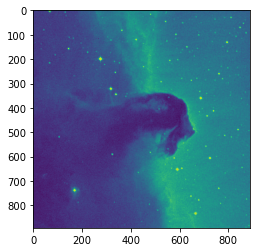

In [7]:
plt.imshow(img_data)
# plt.colorbar()

In [8]:
# help(plt.imshow)

---
## **Celestial Coordinate Systems** <a name="coord"></a>
If one were to begin the pursuit of studying the heavens from scratch, they would promptly realise the need for an elaborate reference system to record the positions of celestial bodies for one's own bookkeeping, but also for sharing their findings with others. Hence, it is important to understand the coordinate systems used to map the sky to do most of astronomy.

The **celestial sphere** is an imaginary sphere or shell that has an arbitrarily large radius, upon which all the celestial bodies can be projected. Since the radius is arbitrary and not of importance to us, we only need two coordinates to specify the position of any body. This is the basis for all the coordinate systems we are going to discuss, with the only differences being their centers and the references from which we measure the two coordinates.

The coordinate systems we'll be looking at are:
1. Horizontal system
2. Equatorial system
3. Ecliptic system
4. Galactic system

### Horizontal System:
<img src="images/horizon.png" width=696.5 height=432/>

Also called Altitude-Azimuth system. This system is the most natural frame from an observer's point of view. Its reference plane is the tangent plane of the Earth passing through the observer; this horizontal plane intersects the celestial sphere along the horizon. 

The difficulty with this system is that the coordinates change over time and based on your location on Earth. *What happens if the observer is at the North or South Pole?*

### Equatorial System:
<img src="images/equatorial.png" width=696.5 height=432/>

Analogous to the latitude-longitude system we use for Earth. The equator is taken as the reference plane, thus defining the North (and South) celestial poles as well as declination. Right ascension is measured from the Sun at the March equinox i.e. the First Point of Aries, which is the place on the celestial sphere where the Sun crosses the celestial equator from south to north at the March equinox. These coordinates can be used irrespective of location and time (to some extent).

RA is also represented in units of `hours`, not to denote time per se, but for historical reasons. An RA of 1 hour is equivalent to 15 degrees at the celestial equator.

### Ecliptic System:
<img src="images/ecliptic.png" width=432 height=432/>

Ecliptic latitude and ecliptic longitude are the coordinates for this system. The ecliptic longitude has the same reference as right ascension. Mainly used for planets and other bodies in the solar system, as most planets have negligible inclination to the ecliptic. There is a heliocentric ecliptic system as well, but I am omitting that here.

### Galactic System:
<img src="images/galactic.jpg" width=432 height=432/>

Galactic latitude and galactic longitude are the coordinates for this system. This system is primarily used for bodies in the Milky Way Galaxy. The reference plane is the galactic plane.

## **Units and Coordinates using Astropy** <a name="units"></a>
We can use astropy to work with these coordinates. Here we discuss how to store them and also demonstrate some transformations between systems.

In [9]:
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time

`astropy.units` handles defining, converting between, and performing arithmetic with physical quantities, such as meters, seconds, Hz, etc. 

`u.deg` is a way to specify the units of our arguments. 

In [10]:
coords = SkyCoord(12.11*u.deg, 85.26*u.deg)
coords

<SkyCoord (ICRS): (ra, dec) in deg
    (12.11, 85.26)>

It has the attributes `ra` and `dec`. We can also retrieve these values in different units.

In [11]:
coords.ra
# coords.ra.hour

<Longitude 12.11 deg>

Transforming from one system to another can be done using `transform_to`. 

In [12]:
coords.transform_to('galactic')

<SkyCoord (Galactic): (l, b) in deg
    (122.86494563, 22.3886423)>

#### What if we want to transform `coords` to the Horizontal system?

In [13]:
iitm = EarthLocation(lat=12.992*u.deg, lon=80.234*u.deg, height=50*u.m)
time = Time('2021-7-11 22:00:00') - 5.5*u.hour

In [14]:
coords_h = coords.transform_to(AltAz(obstime=time, location=iitm))
coords_h.alt

<Latitude 13.40240657 deg>

---
## **Filters** <a name="filter"></a>
Images of astronomical objects are usually taken with detectors called Charge Coupled Devices or CCDs. You can think of them as the modern-day equivalent of photographic film used in old cameras. The CCDs present in telescopes and astronomical cameras collect photons from deep space objects and create an image displaying the intensity values of the incoming light.

<img src="images/filters.gif"/> 

---
## **Photometric Concepts** <a name="photo"></a>
### 1. Specific flux: The amount of energy at wavelength $\lambda$ traversing a unit area per unit time. It is denoted by $f_{\nu}$ or $F_{\nu}$. Units are $W m^{−2} Hz^{−1}$.
### 2. Flux: The amount of electromagnetic energy traversing a unit area per unit time. It is denoted by $f$ or $F$. Units are $W m^{−2}$.
### 3. (Bolometric) Luminosity: The total amount of electromagnetic energy emitted per unit of time by a star, galaxy, or other astronomical object. Units are $W$ or solar Luminosities. If $R$ is the effective stellar radius, then  $L=4\pi r^2F$.
### Notice how $F$ falls off as proportional to $1/r^2$ for a fixed source.
<img src="images/flux.png" width=400 height=400/> 

### 4. Magnitudes are a measure of brightness. Apparent magnitude is defined by the following formula:           
### $m=-2.5\log(F/F_0)$
### where $F_0$ is some preselected flux at which magnitude is 0. Magnitude has no units, but is usually written along with the suffix 'mag'.
### 5. Absolute magnitude is defined to be the apparent magnitude an object would have if it were located at a distance of 10 parsecs.
<img src="images/abs.png"/> 


---
## Astrophotography demonstration followed by DS9 after this! 